### Objective
---
Is there any relationship between the GDP (in terms of purchasing power parity) of a country and the percentage of its Internet users? And is this trend similar for low-income/middle-income/high-income countries?

**Links to reffer**
1. https://towardsdatascience.com/data-analytics-with-python-by-web-scraping-illustration-with-cia-world-factbook-abbdaa687a84

2. https://nbviewer.jupyter.org/github/tirthajyoti/Web-Database-Analytics/blob/master/CIA-Factbook-Analytics2.ipynb

3. https://github.com/tirthajyoti/Web-Database-Analytics

In [1]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
url="https://www.cia.gov/library/publications/the-world-factbook/"
res=requests.get(url)
res.status_code

200

In [3]:
soup = BeautifulSoup(res.text, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<!-- THIS TEMPLATE IS USED TO GENERATE THE AGENCY VERSION OF THE WFB SITE -->
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en">
<![endif]-->
<!--[if IE 7]>
<html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->
<!--[if IE 8]>
<html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]>
<!-->
<html class="no-js" lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title>
   The World Factbook - Central Intelligence Agency
  </title>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="FEB 1, 2018" name="LastModified"/>
  <link href="stylesheets/smallscreen.css" rel="stylesheet" type="text/css"/>
  <!--[if lt IE 9]>
  <link href="stylesheets/fullscreen.css" rel="stylesheet" type="text/c

---
### Extract the country names and codes from the parsed HTML doc

Here is how in BeautifulSoup we use the **"find_all"** method to find all the country names and codes embedded in the HTML.<br />
**Basically, the idea is to find the HTML tags named ‘option’. The "text" in that tag is the country name and the "char 5 and 6" of the tag value represent the 2-character country code.**

In [4]:
country_codes=[]
country_names=[]
for tag in soup.find_all('option'):
    country_codes.append(tag.get('value')[5:7])
    country_names.append(tag.text)

temp=country_codes.pop(0) # To remove the first entry 'World'
temp=country_names.pop(0) # To remove the first entry 'World'

In [5]:
 print('COUNTRY NAMES\n'+'-'*30) #This line will print "country name" and "30 ---"
for country in country_names[1:]:
    print(country,end=',')
print('\n\nCOUNTRY CODES\n'+'-'*30)
for country in country_codes[1:]:
    print(country,end=',')

COUNTRY NAMES
------------------------------

            Afghanistan
          ,
            Akrotiri
          ,
            Albania
          ,
            Algeria
          ,
            American Samoa
          ,
            Andorra
          ,
            Angola
          ,
            Anguilla
          ,
            Antarctica
          ,
            Antigua and Barbuda
          ,
            Arctic Ocean
          ,
            Argentina
          ,
            Armenia
          ,
            Aruba
          ,
            Ashmore and Cartier Islands
          ,
            Atlantic Ocean
          ,
            Australia
          ,
            Austria
          ,
            Azerbaijan
          ,
            Bahamas, The
          ,
            Bahrain
          ,
            Baker Island
          ,
            Bangladesh
          ,
            Barbados
          ,
            Belarus
          ,
            Belgium
          ,
            Belize
          ,
            B

### Extract the demographics

In [14]:
# Base URL
"""
In the below mentioned link at each country code we get different information.
for example: https://www.cia.gov/library/publications/resources/the-world-factbook/geos/af.html
here, af = AFGHANISTAN

We get the whole information about the country on this page like

Introduction :: AFGHANISTANPanel

Geography :: AFGHANISTANPanel 

People and Society :: AFGHANISTANPanel

Government :: AFGHANISTANPanel 

Economy :: AFGHANISTANPanel 

Energy :: AFGHANISTANPanel 

Communications :: AFGHANISTANPanel 

Military and Security :: AFGHANISTANPanel 

Transportation :: AFGHANISTANPanel 

Terrorism :: AFGHANISTANPanel 

Transnational Issues :: AFGHANISTAN

"""

urlbase = 'https://www.cia.gov/library/publications/the-world-factbook/geos/'
demographics1=[]
demographics2=[]
demographics3=[]
demographics4=[]
demographics5=[]

offset = len('65 years and over: ')

# Iterate over every country
for i in range(1,len(country_names)-1):
    country_html=country_codes[i]+'.html'
    url_to_get=urlbase+country_html
    # Read the HTML from the URL and pass on to BeautifulSoup
    html = requests.get(url_to_get).text
    soup = BeautifulSoup(html, 'html.parser')
    
    txt=soup.get_text()
    pos1=txt.find('0-14 years:')
    #result=soup.find(id="field-age-structure")
    #pos1=soup.find_all('category_data subfield numeric',string= '0-14 years:')
    #print(result)
    #print(pos1)
    
    pos2=txt.find('15-24 years:')
    pos3=txt.find('25-54 years:')
    pos4=txt.find('55-64 years:')
    pos5=txt.find('65 years and over:')
    
    
    if pos1==-1:
        print(f"**0-14 years % data not found for {country_names[i]}!**")
        demographics1.append(np.nan)
    else:
        text=txt[pos1+12:pos1+18]
        end=re.search('%',text).start()
        a=float((txt[pos1+12:pos1+12+end]))
        demographics1.append(a)
        print(f"0-14 years % data extraction complete for {country_names[i]}!")
        
    if pos2==-1:
        print(f"**15-24 years % data not found for {country_names[i]}!**")
        demographics2.append(np.nan)
    else:
        text=txt[pos2+13:pos2+19]
        end=re.search('%',text).start()
        a=float((txt[pos2+13:pos2+13+end]))
        demographics2.append(a)
        print(f"15-24 years % data extraction complete for {country_names[i]}!")
        
    if pos3==-1:
        print(f"**25-54 years % data not found for {country_names[i]}!**")
        demographics3.append(np.nan)
    else:
        text=txt[pos3+13:pos3+19]
        end=re.search('%',text).start()
        a=float((txt[pos3+13:pos3+13+end]))
        demographics3.append(a)
        print(f"25-54 years % data extraction complete for {country_names[i]}!")
    
    if pos4==-1:
        print(f"**55-64 years % data not found for {country_names[i]}!**")
        demographics4.append(np.nan)
    else:
        text=txt[pos4+13:pos4+19]
        end=re.search('%',text).start()
        a=float((txt[pos4+13:pos4+13+end]))
        demographics4.append(a)
        print(f"55-64 years % data extraction complete for {country_names[i]}!")
    
    
    if pos5==-1:
        print(f"**65 years and beyond % data not found for {country_names[i]}!**")
        demographics5.append(np.nan)
    else:
        text=txt[pos5+offset:pos5+offset+6]
        end=re.search('%',text).start()
        a=float((txt[pos5+offset:pos5+offset+end]))
        demographics5.append(a)
        print(f"65 years and beyond % data extraction complete for {country_names[i]}!")

0-14 years % data extraction complete for 
            Afghanistan
          !
15-24 years % data extraction complete for 
            Afghanistan
          !
25-54 years % data extraction complete for 
            Afghanistan
          !
55-64 years % data extraction complete for 
            Afghanistan
          !
65 years and beyond % data extraction complete for 
            Afghanistan
          !
**0-14 years % data not found for 
            Akrotiri
          !**
**15-24 years % data not found for 
            Akrotiri
          !**
**25-54 years % data not found for 
            Akrotiri
          !**
**55-64 years % data not found for 
            Akrotiri
          !**
**65 years and beyond % data not found for 
            Akrotiri
          !**
0-14 years % data extraction complete for 
            Albania
          !
15-24 years % data extraction complete for 
            Albania
          !
25-54 years % data extraction complete for 
            Albania
          !
55-6

**0-14 years % data not found for 
            Baker Island
          !**
**15-24 years % data not found for 
            Baker Island
          !**
**25-54 years % data not found for 
            Baker Island
          !**
**55-64 years % data not found for 
            Baker Island
          !**
**65 years and beyond % data not found for 
            Baker Island
          !**
0-14 years % data extraction complete for 
            Bangladesh
          !
15-24 years % data extraction complete for 
            Bangladesh
          !
25-54 years % data extraction complete for 
            Bangladesh
          !
55-64 years % data extraction complete for 
            Bangladesh
          !
65 years and beyond % data extraction complete for 
            Bangladesh
          !
0-14 years % data extraction complete for 
            Barbados
          !
15-24 years % data extraction complete for 
            Barbados
          !
25-54 years % data extraction complete for 
            Barbado

0-14 years % data extraction complete for 
            Cabo Verde
          !
15-24 years % data extraction complete for 
            Cabo Verde
          !
25-54 years % data extraction complete for 
            Cabo Verde
          !
55-64 years % data extraction complete for 
            Cabo Verde
          !
65 years and beyond % data extraction complete for 
            Cabo Verde
          !
0-14 years % data extraction complete for 
            Cambodia
          !
15-24 years % data extraction complete for 
            Cambodia
          !
25-54 years % data extraction complete for 
            Cambodia
          !
55-64 years % data extraction complete for 
            Cambodia
          !
65 years and beyond % data extraction complete for 
            Cambodia
          !
0-14 years % data extraction complete for 
            Cameroon
          !
15-24 years % data extraction complete for 
            Cameroon
          !
25-54 years % data extraction complete for 
         

0-14 years % data extraction complete for 
            Croatia
          !
15-24 years % data extraction complete for 
            Croatia
          !
25-54 years % data extraction complete for 
            Croatia
          !
55-64 years % data extraction complete for 
            Croatia
          !
65 years and beyond % data extraction complete for 
            Croatia
          !
0-14 years % data extraction complete for 
            Cuba
          !
15-24 years % data extraction complete for 
            Cuba
          !
25-54 years % data extraction complete for 
            Cuba
          !
55-64 years % data extraction complete for 
            Cuba
          !
65 years and beyond % data extraction complete for 
            Cuba
          !
0-14 years % data extraction complete for 
            Curacao
          !
15-24 years % data extraction complete for 
            Curacao
          !
25-54 years % data extraction complete for 
            Curacao
          !
55-64 years % 

0-14 years % data extraction complete for 
            Finland
          !
15-24 years % data extraction complete for 
            Finland
          !
25-54 years % data extraction complete for 
            Finland
          !
55-64 years % data extraction complete for 
            Finland
          !
65 years and beyond % data extraction complete for 
            Finland
          !
0-14 years % data extraction complete for 
            France
          !
15-24 years % data extraction complete for 
            France
          !
25-54 years % data extraction complete for 
            France
          !
55-64 years % data extraction complete for 
            France
          !
65 years and beyond % data extraction complete for 
            France
          !
0-14 years % data extraction complete for 
            French Polynesia
          !
15-24 years % data extraction complete for 
            French Polynesia
          !
25-54 years % data extraction complete for 
            French

**0-14 years % data not found for 
            Heard Island and McDonald Islands
          !**
**15-24 years % data not found for 
            Heard Island and McDonald Islands
          !**
**25-54 years % data not found for 
            Heard Island and McDonald Islands
          !**
**55-64 years % data not found for 
            Heard Island and McDonald Islands
          !**
**65 years and beyond % data not found for 
            Heard Island and McDonald Islands
          !**
**0-14 years % data not found for 
            Holy See (Vatican City)
          !**
**15-24 years % data not found for 
            Holy See (Vatican City)
          !**
**25-54 years % data not found for 
            Holy See (Vatican City)
          !**
**55-64 years % data not found for 
            Holy See (Vatican City)
          !**
**65 years and beyond % data not found for 
            Holy See (Vatican City)
          !**
0-14 years % data extraction complete for 
            Honduras
          !


**0-14 years % data not found for 
            Johnston Atoll
          !**
**15-24 years % data not found for 
            Johnston Atoll
          !**
**25-54 years % data not found for 
            Johnston Atoll
          !**
**55-64 years % data not found for 
            Johnston Atoll
          !**
**65 years and beyond % data not found for 
            Johnston Atoll
          !**
0-14 years % data extraction complete for 
            Jordan
          !
15-24 years % data extraction complete for 
            Jordan
          !
25-54 years % data extraction complete for 
            Jordan
          !
55-64 years % data extraction complete for 
            Jordan
          !
65 years and beyond % data extraction complete for 
            Jordan
          !
0-14 years % data extraction complete for 
            Kazakhstan
          !
15-24 years % data extraction complete for 
            Kazakhstan
          !
25-54 years % data extraction complete for 
            Kazakhstan
  

0-14 years % data extraction complete for 
            Madagascar
          !
15-24 years % data extraction complete for 
            Madagascar
          !
25-54 years % data extraction complete for 
            Madagascar
          !
55-64 years % data extraction complete for 
            Madagascar
          !
65 years and beyond % data extraction complete for 
            Madagascar
          !
0-14 years % data extraction complete for 
            Malawi
          !
15-24 years % data extraction complete for 
            Malawi
          !
25-54 years % data extraction complete for 
            Malawi
          !
55-64 years % data extraction complete for 
            Malawi
          !
65 years and beyond % data extraction complete for 
            Malawi
          !
0-14 years % data extraction complete for 
            Malaysia
          !
15-24 years % data extraction complete for 
            Malaysia
          !
25-54 years % data extraction complete for 
            Malaysi

**0-14 years % data not found for 
            Navassa Island
          !**
**15-24 years % data not found for 
            Navassa Island
          !**
**25-54 years % data not found for 
            Navassa Island
          !**
**55-64 years % data not found for 
            Navassa Island
          !**
**65 years and beyond % data not found for 
            Navassa Island
          !**
0-14 years % data extraction complete for 
            Nepal
          !
15-24 years % data extraction complete for 
            Nepal
          !
25-54 years % data extraction complete for 
            Nepal
          !
55-64 years % data extraction complete for 
            Nepal
          !
65 years and beyond % data extraction complete for 
            Nepal
          !
0-14 years % data extraction complete for 
            Netherlands
          !
15-24 years % data extraction complete for 
            Netherlands
          !
25-54 years % data extraction complete for 
            Netherlands
    

0-14 years % data extraction complete for 
            Paraguay
          !
15-24 years % data extraction complete for 
            Paraguay
          !
25-54 years % data extraction complete for 
            Paraguay
          !
55-64 years % data extraction complete for 
            Paraguay
          !
65 years and beyond % data extraction complete for 
            Paraguay
          !
0-14 years % data extraction complete for 
            Peru
          !
15-24 years % data extraction complete for 
            Peru
          !
25-54 years % data extraction complete for 
            Peru
          !
55-64 years % data extraction complete for 
            Peru
          !
65 years and beyond % data extraction complete for 
            Peru
          !
0-14 years % data extraction complete for 
            Philippines
          !
15-24 years % data extraction complete for 
            Philippines
          !
25-54 years % data extraction complete for 
            Philippines
         

0-14 years % data extraction complete for 
            Sao Tome and Principe
          !
15-24 years % data extraction complete for 
            Sao Tome and Principe
          !
25-54 years % data extraction complete for 
            Sao Tome and Principe
          !
55-64 years % data extraction complete for 
            Sao Tome and Principe
          !
65 years and beyond % data extraction complete for 
            Sao Tome and Principe
          !
0-14 years % data extraction complete for 
            Saudi Arabia
          !
15-24 years % data extraction complete for 
            Saudi Arabia
          !
25-54 years % data extraction complete for 
            Saudi Arabia
          !
55-64 years % data extraction complete for 
            Saudi Arabia
          !
65 years and beyond % data extraction complete for 
            Saudi Arabia
          !
0-14 years % data extraction complete for 
            Senegal
          !
15-24 years % data extraction complete for 
            

**0-14 years % data not found for 
            Svalbard
          !**
**15-24 years % data not found for 
            Svalbard
          !**
**25-54 years % data not found for 
            Svalbard
          !**
**55-64 years % data not found for 
            Svalbard
          !**
**65 years and beyond % data not found for 
            Svalbard
          !**
0-14 years % data extraction complete for 
            Sweden
          !
15-24 years % data extraction complete for 
            Sweden
          !
25-54 years % data extraction complete for 
            Sweden
          !
55-64 years % data extraction complete for 
            Sweden
          !
65 years and beyond % data extraction complete for 
            Sweden
          !
0-14 years % data extraction complete for 
            Switzerland
          !
15-24 years % data extraction complete for 
            Switzerland
          !
25-54 years % data extraction complete for 
            Switzerland
          !
55-64 years % dat

0-14 years % data extraction complete for 
            United Kingdom
          !
15-24 years % data extraction complete for 
            United Kingdom
          !
25-54 years % data extraction complete for 
            United Kingdom
          !
55-64 years % data extraction complete for 
            United Kingdom
          !
65 years and beyond % data extraction complete for 
            United Kingdom
          !
0-14 years % data extraction complete for 
            United States
          !
15-24 years % data extraction complete for 
            United States
          !
25-54 years % data extraction complete for 
            United States
          !
55-64 years % data extraction complete for 
            United States
          !
65 years and beyond % data extraction complete for 
            United States
          !
**0-14 years % data not found for 
            United States Pacific Island Wildlife Refuges
          !**
**15-24 years % data not found for 
            United

In [15]:
data={
    '0-14 years old %':demographics1,
    '15-24 years %':demographics2,
    '25-54 years %':demographics3,
    '55-64 years %':demographics4,
    '65 years and above %':demographics5
}
#df1=pd.DataFrame(data=data,index=country_names[1:5])
df_demo=pd.DataFrame(data=data,index=country_names[1:len(country_codes)-1])
df_demo.index.name='COUNTRY'
df_demo.dropna(inplace=True)
df_demo

,0-14 years old %,15-24 years %,25-54 years %,55-64 years %,65 years and above %
COUNTRY,,,,,
\n Afghanistan\n,40.62,21.26,31.44,4.01,2.68
\n Albania\n,17.60,15.39,42.04,11.94,13.03
\n Algeria\n,29.58,13.93,42.91,7.41,6.17
\n American Samoa\n,27.76,18.16,37.49,9.69,6.90
\n Andorra\n,13.37,10.16,43.19,15.91,17.36
...,...,...,...,...,...
\n West Bank\n,35.31,20.75,35.19,5.12,3.62
\n Western Sahara\n,36.29,19.44,34.90,5.27,4.10
\n Yemen\n,39.16,21.26,32.78,4.00,2.80


### Save the data in an Excel file

In [16]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Demo1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df_demo.to_excel(writer, sheet_name='Demographics')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

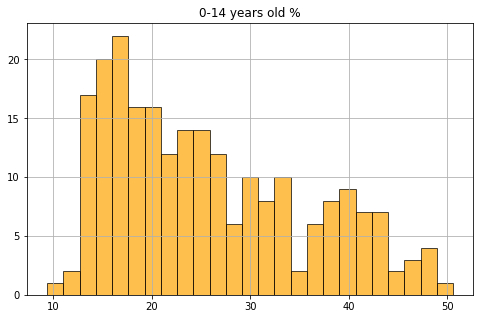

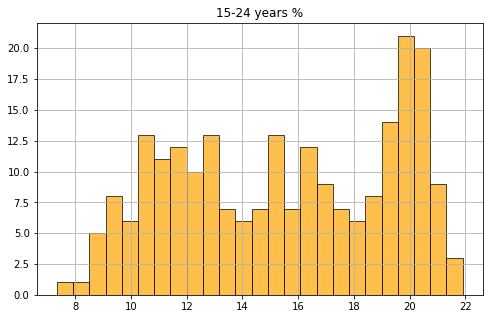

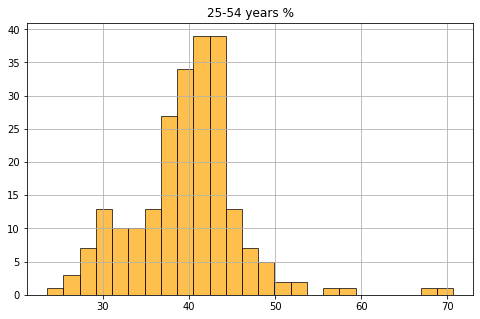

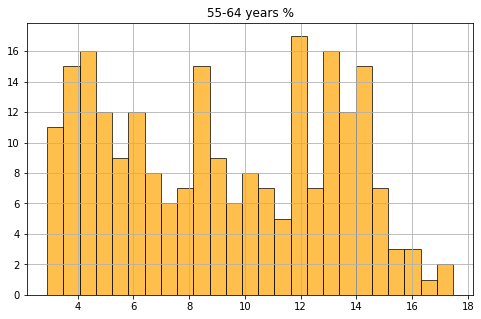

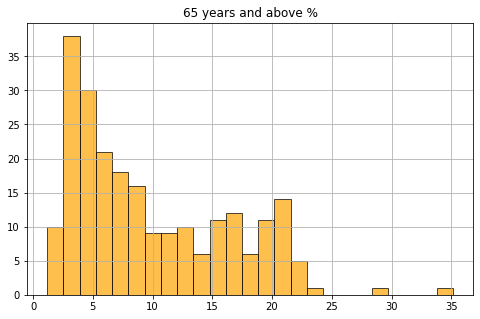

In [17]:
for i in range(5):
    df_demo.hist(df_demo.columns[i],bins=25,figsize=(8,5),color='orange',edgecolor='k',alpha=0.7)
    plt.show()


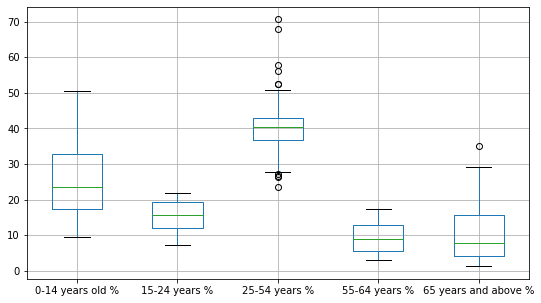

In [18]:
df_demo.boxplot(figsize=(9,5))
plt.show()

### Download all text data and save in a pickle file for easy later access

In [19]:
# Base URL
urlbase = 'https://www.cia.gov/library/publications/the-world-factbook/geos/'
# Empty data dictionary
text_data=dict()

# Iterate over every country
for i in range(1,len(country_names)-1):
    country_html=country_codes[i]+'.html'
    url_to_get=urlbase+country_html
    # Read the HTML from the URL and pass on to BeautifulSoup
    html = requests.get(url_to_get).text
    soup = BeautifulSoup(html, 'html.parser')
    
    txt=soup.get_text()
    text_data[country_names[i]]=txt
    print(f"Finished loading data for {country_names[i]}")
    
print ("\n**Finished downloading all text data!**")

Finished loading data for 
            Afghanistan
          
Finished loading data for 
            Akrotiri
          
Finished loading data for 
            Albania
          
Finished loading data for 
            Algeria
          
Finished loading data for 
            American Samoa
          
Finished loading data for 
            Andorra
          
Finished loading data for 
            Angola
          
Finished loading data for 
            Anguilla
          
Finished loading data for 
            Antarctica
          
Finished loading data for 
            Antigua and Barbuda
          
Finished loading data for 
            Arctic Ocean
          
Finished loading data for 
            Argentina
          
Finished loading data for 
            Armenia
          
Finished loading data for 
            Aruba
          
Finished loading data for 
            Ashmore and Cartier Islands
          
Finished loading data for 
            Atlantic Ocean
          
Finished load

Finished loading data for 
            Kuwait
          
Finished loading data for 
            Kyrgyzstan
          
Finished loading data for 
            Laos
          
Finished loading data for 
            Latvia
          
Finished loading data for 
            Lebanon
          
Finished loading data for 
            Lesotho
          
Finished loading data for 
            Liberia
          
Finished loading data for 
            Libya
          
Finished loading data for 
            Liechtenstein
          
Finished loading data for 
            Lithuania
          
Finished loading data for 
            Luxembourg
          
Finished loading data for 
            Macau
          
Finished loading data for 
            Madagascar
          
Finished loading data for 
            Malawi
          
Finished loading data for 
            Malaysia
          
Finished loading data for 
            Maldives
          
Finished loading data for 
            Mali
          
Finished

In [20]:
import pickle
pickle.dump(text_data,open("text_data_CIA_Factobook.p", "wb"))

In [21]:
text_data = pickle.load(open("text_data_CIA_Factobook.p", "rb"))
avg = 0
total=0
for k,v in text_data.items():
    total+=len(v)
print("Total length",total)
avg=total/len(text_data)
print("Average length",avg)

Total length 30950575
Average length 116355.54511278195


In [33]:
text_data.keys()

dict_keys(['\n            Afghanistan\n          ', '\n            Akrotiri\n          ', '\n            Albania\n          ', '\n            Algeria\n          ', '\n            American Samoa\n          ', '\n            Andorra\n          ', '\n            Angola\n          ', '\n            Anguilla\n          ', '\n            Antarctica\n          ', '\n            Antigua and Barbuda\n          ', '\n            Arctic Ocean\n          ', '\n            Argentina\n          ', '\n            Armenia\n          ', '\n            Aruba\n          ', '\n            Ashmore and Cartier Islands\n          ', '\n            Atlantic Ocean\n          ', '\n            Australia\n          ', '\n            Austria\n          ', '\n            Azerbaijan\n          ', '\n            Bahamas, The\n          ', '\n            Bahrain\n          ', '\n            Baker Island\n          ', '\n            Bangladesh\n          ', '\n            Barbados\n          ', '\n            Belarus\

### Function to convert a string with a comma (e.g. a GDP value) to a float


In [24]:
def convert_float(string):
    if string.isnumeric():
        return float(string)
    if string[0].isdigit():
        if ',' not in string and '.' in string:
            return float(string)
        if ',' not in string and '.' not in string:
            idx=string.find(' ')
            result = string[:idx]
            return float(result)
        idx1=string.find(',')
        idx2=string.find(' ')
        result = string[:idx1]+string[idx1+1:idx2]
        return float(result)
    else:
        return (-1)

### Extract Total GDP (PPP) (in billion $)

In [38]:
# Initialize dictionary for holding the data
Total_GDP_PPP = {}
# Iterate over every country
for i in range(1,len(country_names)-1):
    country= country_names[i]
    txt=text_data[country]       
    pos = txt.find("GDP (purchasing power parity):")
    if pos!=-1: 
        pos= pos+len('GDP (purchasing power parity):')
        string = txt[pos+1:pos+15]
        start = re.search('\$',string)
        end = re.search('[b,t]',string)
        if (start!=None and end!=None):
            start=start.start()
            end=end.start()
            a=string[start+1:start+end-1]
            print(a)
            a = convert_float(a)
            if (string[end]=='t'):
                # If the GDP was in trillions, multiply it by 1000
                a=1000*a
            #print(f"Total GDP (PPP) of {country}: {a} billion")
            # Insert the data in the dictionary
            Total_GDP_PPP[country]=a
        else:
            print("**Could not find GDP data!**")
    else:
        print("**Could not find GDP data!**")

print ("\nFinished finding all GDP (Purchasing Power Parity) (in billion $) data")

**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not find GDP data!**
**Could not fi